<a href="https://colab.research.google.com/github/jolied-14/MLE-F2025/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5

Name: Jolie Dolan<br>
RIN: 662020565

## Question 1

Construct a convolutional neural network model for classifying the CIFAR-10 dataset. Use the test set of the CIFAR-10 dataset as validation data for the model

(a) Implement the convolutional neural network architecture given below<br>
--> all parts will be implemented and labeled accordingly with comments.

(b) Calculate and plot the training and validation accuracies of the network
after 10 epochs with a batch size of 64.

### Part A

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    # i. First convolutional layer
    Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    # ii. First max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # iii. Second convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # iv. Second max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    # v. Third convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # vi. Flatten layer
    Flatten(),
    # vii. Dense layer
    Dense(units=64, activation='relu'),
    # viii. Output layer
    Dense(units=10, activation='softmax') # CIFAR-10 has 10 classes
])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,058 (258.04 KB)

 Trainable params: 66,058 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

### Part B


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 115ms/step - accuracy: 0.3013 - loss: 1.8817 - val_accuracy: 0.4660 - val_loss: 1.4396
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 118ms/step - accuracy: 0.5064 - loss: 1.3651 - val_accuracy: 0.5234 - val_loss: 1.3178
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5621 - loss: 1.2201 - val_accuracy: 0.5841 - val_loss: 1.1688
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.6033 - loss: 1.1168 - val_accuracy: 0.6009 - val_loss: 1.1273
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.6281 - loss: 1.0488 - val_accuracy: 0.6319 - val_loss: 1.0531
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 114ms/step - accuracy: 0.6583 - loss: 0.9745 - val_accuracy: 0.6111 - val_loss: 1.1075
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 116ms/step - accuracy: 0.6672 - loss: 0.9467 - val_accuracy: 0.6542 - val_loss: 0.9965
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 115ms/step - accuracy: 0.6826 - los

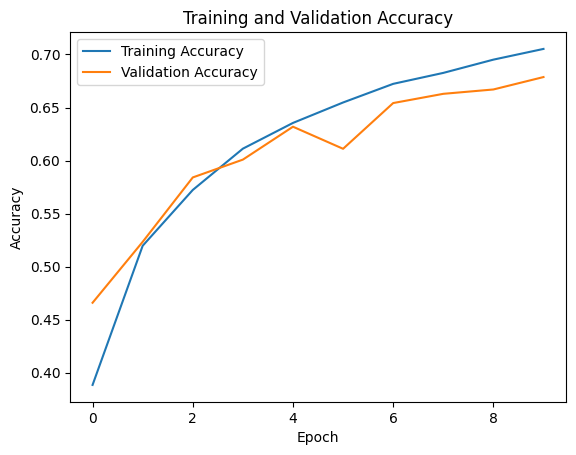

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Question 2

Use the Scikit-learn breast cancer Wisconsin dataset and support vector machine classifiers to classify breast cancers. You must use worst compactness, worst concavity, and worst area features only to perform the classification.

(a) What is the accuracy of the classification model with a linear kernel?<br>
(b) What is the accuracy of the classification model with a radial basis function kernel with regularization strength parameter, C=2?

### Part A

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# Select the specified features
selected_features = ['worst compactness', 'worst concavity', 'worst area']
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# (a) Train an SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)

# Calculate the accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"(a) Accuracy of the classification model with a linear kernel: {accuracy_linear:.4f}")

(a) Accuracy of the classification model with a linear kernel: 0.9649


### Part B

In [6]:
# (b) Train an SVM with a radial basis function kernel and C=2
svm_rbf = SVC(kernel='rbf', C=2)
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate the accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"(b) Accuracy of the classification model with a radial basis function kernel (C=2): {accuracy_rbf:.4f}")

(b) Accuracy of the classification model with a radial basis function kernel (C=2): 0.9474
